## **C S 509 HW3**

**Author:** Indronil Bhattacharjee

**Submitted on:** September 19, 2023


=============================================================

### **Task 1:** Removing the version number from an Ensembl ID ###

In [7]:
cut.version.number <- function(ensembl.id) {
  truncated_ids <- gsub("\\.\\d+", "", ensembl.id)
  return(truncated_ids)
}


ensembl.id <- c("ENST00000621592.8", "ENST00000377970.6", "ENST00000259523.10")
truncated_ids <- cut.version.number(ensembl.id)
print(truncated_ids)

[1] "ENST00000621592" "ENST00000377970" "ENST00000259523"


### **Task 2:** Reading genome annotation in GTF format ###

In [9]:
library(dplyr)
library(ggplot2)

# Read the GTF file
gtf_file <- readLines("/kaggle/input/GENCODE-Human-Genome-Annotation-GTF/gencode.v44.annotation.gtf")

#### **Task 2.1:** Three differences between GTF and GFF3 formats ####

**1. Field Structure and Order:**

GTF: GTF has a fixed and well-defined structure with a specific order of fields. These fields include the sequence name, source, feature type, start position, end position, score, strand, frame, and attribute. The field order is consistent across GTF files.

GFF3: GFF3, on the other hand, is more flexible in terms of field structure and order. It uses column headers to specify the meaning of each column, allowing users to define and include additional attributes as needed. This flexibility makes GFF3 suitable for a wide range of annotations beyond gene-centric data.

**2. Attribute Format:**

GTF: GTF typically uses a simplified attribute format with predefined attributes like "gene_id" and "transcript_id." These attributes are represented as key-value pairs and are well-suited for gene-related annotations. For example, "gene_id "ENSG12345"; transcript_id "ENST67890";".

GFF3: GFF3 allows for more general attribute representations. It uses a "key=value" format for attributes, which provides greater flexibility. Users can define custom attributes specific to their annotation data. For example, "ID=gene123;Name=MyGene;Note=This is a custom annotation;".

**3. Comments and Directives:**

GTF: GTF does not have a dedicated structure for comments or directives within the file. It primarily focuses on the feature data.

GFF3: GFF3 includes support for comments and directives. Lines that start with "#" or "##" are used for comments and directives, respectively. Comments can provide additional information, while directives can specify data sources, versions, and other metadata. This makes GFF3 more versatile for including metadata and additional context.

##### **Task 2.2:** Extract gene names for every feature in the GTF file using Regular Expression and their runtime #####

**Method 1:**
The words which match the pattern are extracted and printed immediately without storing this.  

**Method 2:**
The words which match the pattern are extracted and stored in a list as a vector., which takes a longer amount of time since adding elements in a list in R creates a list of n+1 each time when something is added at the end of a list with length n.

In [2]:
#Method 1
pattern <- "gene_name \"(.*?)\";"

# Measure the runtime using system.time
runtime1 <- system.time({
    for (line in gtf_file) {
        if (grepl("gene_name", line)) {
            gene_name <- regmatches(line, regexec(pattern, line))[[1]][2]
            #print(gene_name) [Print escaped for very long output]
        }
    }
})

print(paste("Runtime:", runtime1[1], "seconds"))

[1] "Runtime: 188.45 seconds"


In [1]:
#Method 2
gene_names <- character(0)
pattern <- "gene_name \"(.*?)\";"

# Measure the runtime using system.time
runtime <- system.time({
    for (line in gtf_file) {
        if (grepl("gene_name", line)) {
            gene_name <- regmatches(line, regexec(pattern, line))[[1]][2]
                  gene_names <- c(gene_names, gene_name)
    }
  }
})

# Print the extracted gene names
# print(gene_names) [Print escaped for very long output]

print(paste("Runtime:", runtime2[1], "seconds"))

[1] "Runtime: 1628.48 seconds"


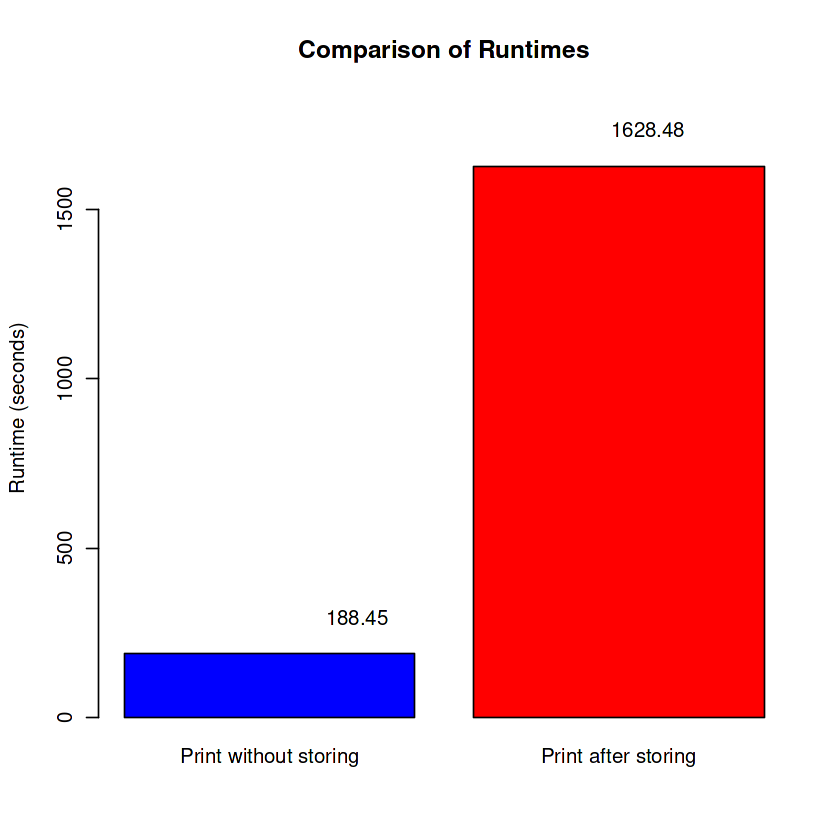

In [11]:
# Create a vector of runtimes
runtimes <- c(runtime1, runtime2)

# Create a bar chart
barplot(runtimes, 
        names.arg = c("Print without storing", "Print after storing"),
        col = c("blue", "red"),  # Colors for the bars
        ylab = "Runtime (seconds)",  # Label for the y-axis
        main = "Comparison of Runtimes",  # Title of the plot
        ylim = c(0, max(runtimes) + 200))  # Adjust the y-axis limits

# Add values on top of the bars
text(x = 1:2, y = runtimes + 50, labels = runtimes, pos = 3, col = "black")